In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
register_matplotlib_converters()

**Ice Cream Production Data**

In [3]:
#read data
df_ice_cream=pd.read_csv('ice_cream.csv')

In [4]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [7]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'date','IPN31152N':'Production'},inplace=True)

In [8]:
#convert date columns to datetime type
df_ice_cream['date']=pd.to_datetime(df_ice_cream.date)

In [9]:
#set date as index
df_ice_cream.set_index('date',inplace=True)

In [12]:
#just get data from 2010 onwards
start_date=pd.to_datetime('2010-01-01')
df_ice_cream=df_ice_cream[start_date:]

In [13]:
df_ice_cream.head()

,Production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


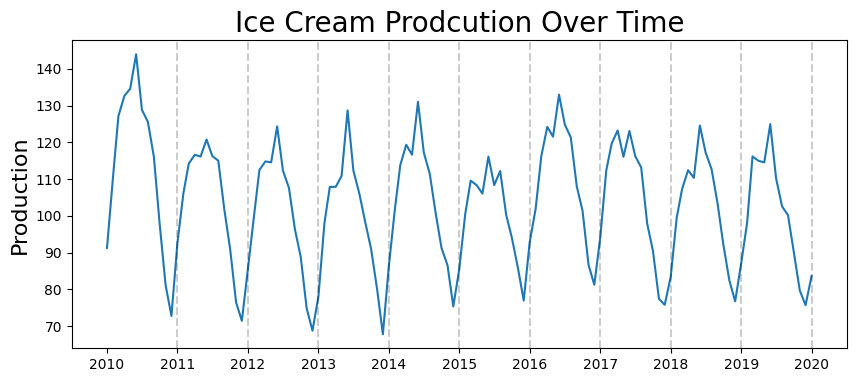

In [16]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.Production)
plt.title('Ice Cream Prodcution Over Time',fontsize=20)
plt.ylabel('Production',fontsize=16)
for year in range(2011,2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--',alpha=0.2)

**ACF**

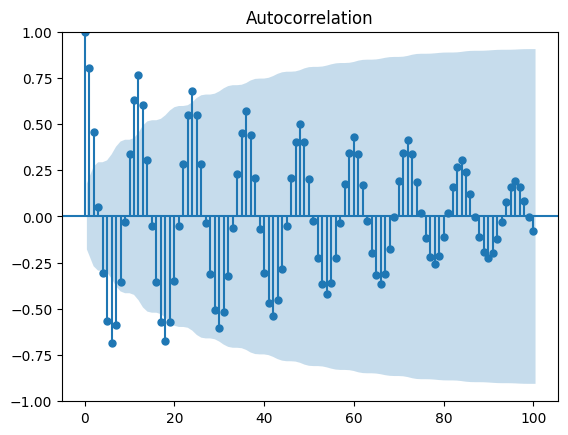

In [20]:
acf_plot = plot_acf(df_ice_cream.Production, lags=100)

**Based on decaying ACF,we are likely dealing with an Auto Regressive process**

**PACF**

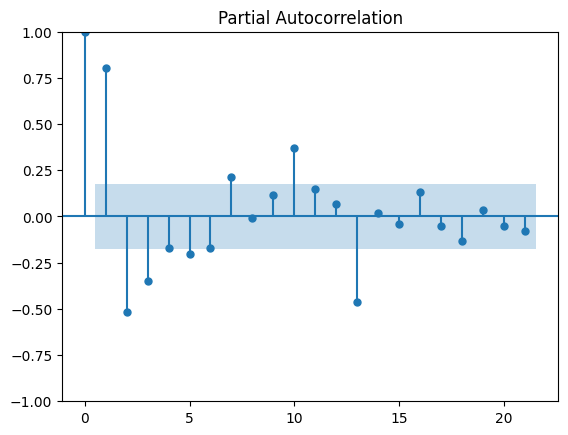

In [22]:
pacf_plot=plot_pacf(df_ice_cream.Production)

**Based on PACF,we should start with an Auto Regressive model with lags 1,2,3,10,13**

**On stock data**

In [23]:
import yfinance as yf

In [32]:
#define the ticker symbol
tickerSymbol = 'SPY'

In [33]:

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [35]:
#get the historical prices for this ticker
tickerDf = tickerData.history(start='2015-1-1', end='2020-1-1')

In [36]:
tickerDf=tickerDf[['Close']]

In [37]:
#see your data
tickerDf.head()

,Close
Date,
2015-01-02 00:00:00-05:00,171.568069
2015-01-05 00:00:00-05:00,168.469589
2015-01-06 00:00:00-05:00,166.882767
2015-01-07 00:00:00-05:00,168.962341
2015-01-08 00:00:00-05:00,171.960571


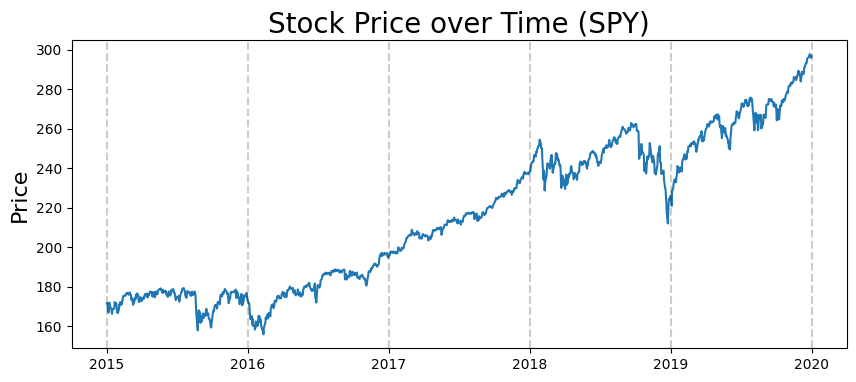

In [38]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

**Stationarity: take first difference of this series**

In [41]:
#take first difference
first_diffs=tickerDf.Close.values[1:]-tickerDf.Close.values[:-1]
first_diffs=np.concatenate([first_diffs,[0]])

In [42]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs


/tmp/ipython-input-42-3649559527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickerDf['FirstDifference'] = first_diffs


In [43]:
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02 00:00:00-05:00,171.568069,-3.098480
2015-01-05 00:00:00-05:00,168.469589,-1.586823
2015-01-06 00:00:00-05:00,166.882767,2.079575
2015-01-07 00:00:00-05:00,168.962341,2.998230
2015-01-08 00:00:00-05:00,171.960571,-1.378006


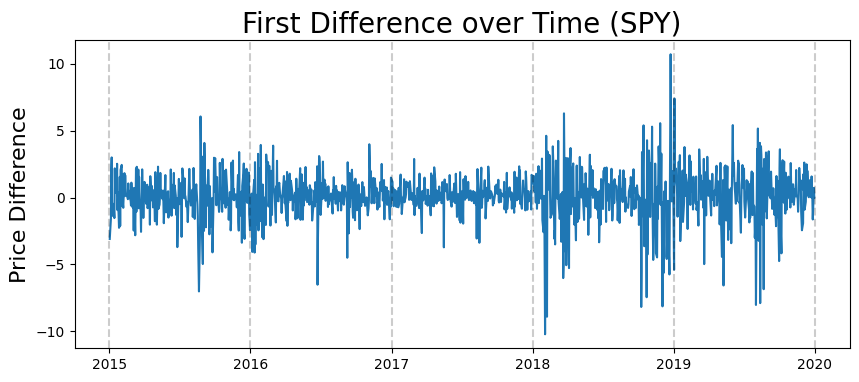

In [44]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

**ACF**

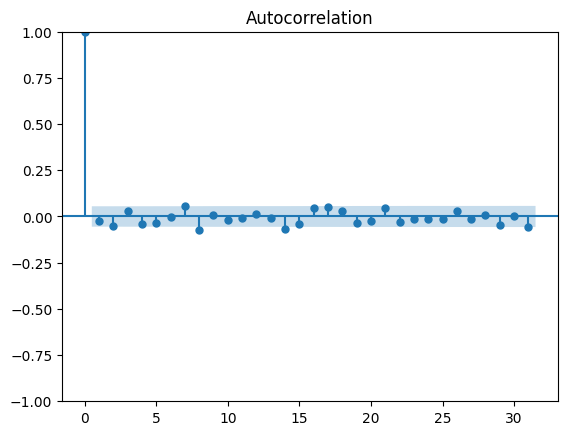

In [45]:

acf_plot = plot_acf(tickerDf.FirstDifference)

**ACF isn't that informative**

**PACF**

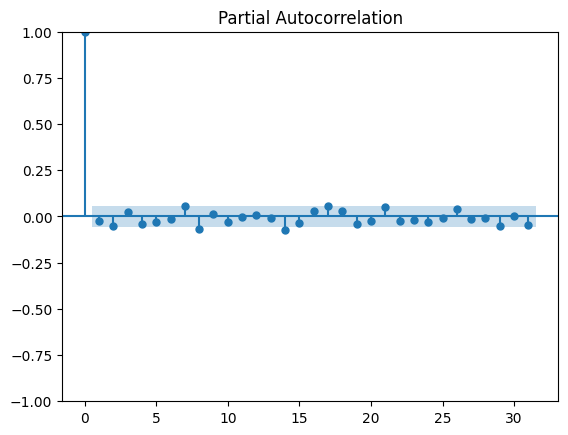

In [46]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

**PACF also doesn't tell us much**